In [8]:
import numpy as np
import seaborn as sns
from typing import Literal, get_args
import json
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_regression
from sklearn.decomposition import PCA
from pandas import json_normalize

sns.set_theme(style="ticks", font_scale=1.4)
sns.set_theme('poster')
sns.set_style('ticks')

## HyperParameters
Model: ResNet-18
Optimizer: Adam
Loss Function: Cross-Entropy
Learning Rate: 0,001
Epochs: 100
Batch Size: 32

In [9]:
base_folder = "./"

In [10]:
Prefix = Literal["general", "medical", "no"]
Stage = Literal["train", "valid"]
Metric = Literal['accuracy', 'loss']

In [11]:
def load_json(prefix: Prefix, stage: Stage, metric: Metric):
    with open(f'{base_folder}{prefix}-{stage}_{metric}.json') as f:
        return json.load(f)[0]

In [12]:
def create_dataframe(prefix: Prefix):
    dataframes = {}
    for stage in get_args(Stage):
        dataframes[stage] = {}
        for metric in get_args(Metric):
            data = load_json(prefix, stage, metric)
            df = json_normalize(data)
            dataframes[stage][metric] = df.explode(["x", "y"], ignore_index=True)
            dataframes[stage][metric].insert(1, 'pre-trained', prefix)
    return dataframes

In [13]:
def create_combined_dataframe(general_dataframe: pd.DataFrame, medical_dataframe: pd.DataFrame, no_dataframe: pd.DataFrame, stage: Stage, metric: Metric):
    return pd.concat([general_dataframe[stage][metric], medical_dataframe[stage][metric], no_dataframe[stage][metric]], ignore_index=True)

In [14]:
general_dataframes = create_dataframe("general")
medical_dataframes = create_dataframe("medical")
no_dataframes = create_dataframe("no")

In [15]:
def show_plot(dataframe: pd.DataFrame, metric_label):
    fig = plt.figure(figsize = (10, 5))
    gfg = sns.lineplot(data=dataframe, x="x", y="y", hue="pre-trained")
    plt.xlabel("Steps")
    plt.ylabel(metric_label)
    plt.setp(gfg.get_legend().get_texts(), fontsize='16') 
    plt.legend(labelspacing = 0.2)
    plt.setp(gfg.get_legend().get_title(), fontsize='16') 
    plt.savefig(f"{base_folder}/{metric_label}.pdf", format="pdf", dpi=300, bbox_inches='tight')

In [16]:
train_acc_combined = create_combined_dataframe(general_dataframes, medical_dataframes, no_dataframes, "train", "accuracy")
valid_acc_combined = create_combined_dataframe(general_dataframes, medical_dataframes, no_dataframes, "valid", "accuracy")

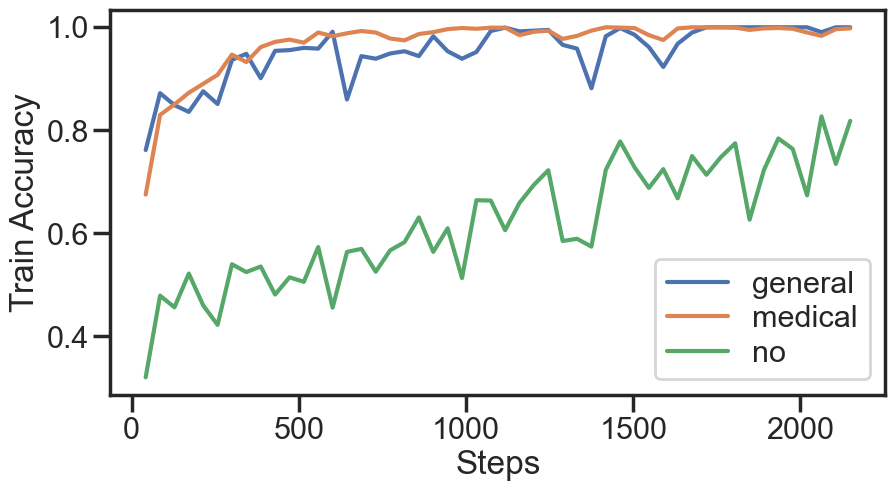

In [17]:
show_plot(train_acc_combined, "Train Accuracy")

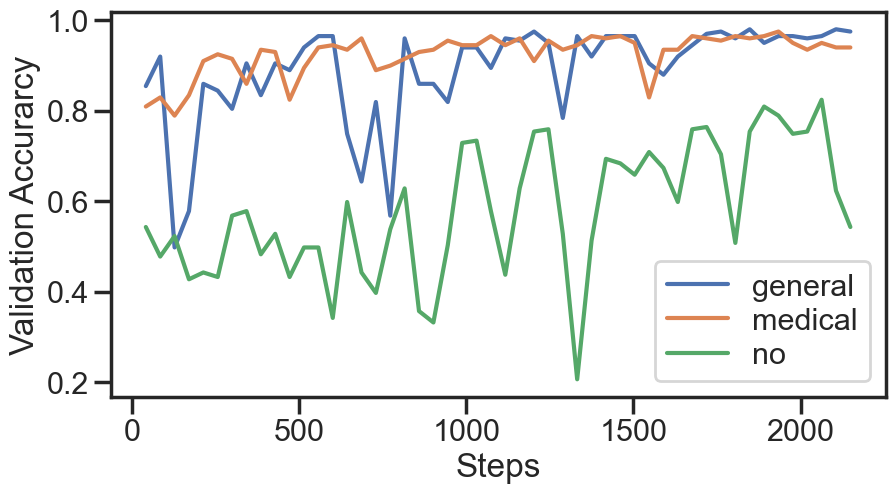

In [18]:
show_plot(valid_acc_combined, "Validation Accurarcy")

In [19]:
# show_plot(test_acc_combined, "Test Accurarcy")

In [20]:
train_loss_combined = create_combined_dataframe(general_dataframes, medical_dataframes, no_dataframes, "train", "loss")
valid_loss_combined = create_combined_dataframe(general_dataframes, medical_dataframes, no_dataframes, "valid", "loss")

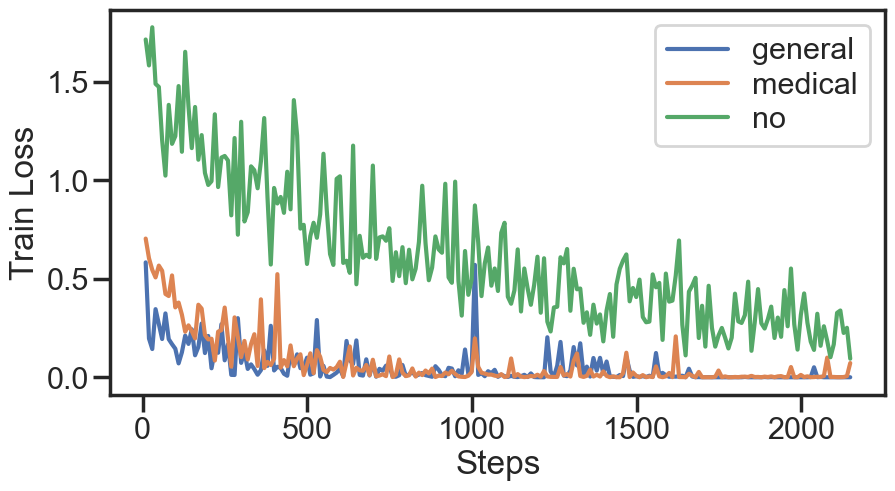

In [21]:
show_plot(train_loss_combined, "Train Loss")

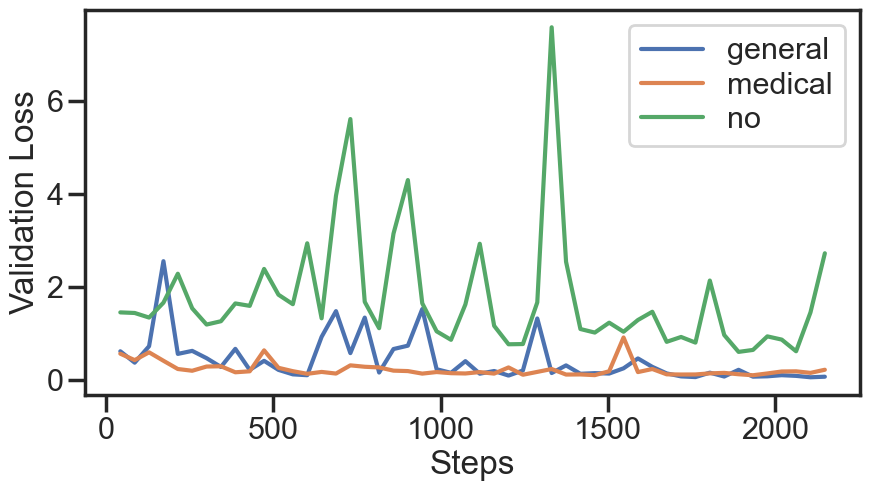

In [22]:
show_plot(valid_loss_combined, "Validation Loss")